In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing the dataset
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
#Find the shape as well as Rows & Columns of the data
print("Shape :",df.shape)
print("Rows",df.shape[0])
print("Columns",df.shape[1])

Shape : (1030, 9)
Rows 1030
Columns 9


In [ ]:
#Finding the duplicates
df.duplicated().sum().any()

np.True_

In [ ]:
#There are duplicates. Now find the duplicates
print("No. of duplicates", df.duplicated().sum())
print("Duplicate rows: \n", df[df.duplicated()])

No. of duplicates 25
Duplicate rows: 
      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
77    425.0               106.3      0.0  153.5              16.5   
80    425.0               106.3      0.0  153.5              16.5   
86    362.6               189.0      0.0  164.9              11.6   
88    362.6               189.0      0.0  164.9              11.6   
91    362.6               189.0      0.0  164.9              11.6   
100   425.0               106.3      0.0  153.5              16.5   
103   425.0               106.3      0.0  153.5              16.5   
109   362.6               189.0      0.0  164.9              11.6   
111   362.6               189.0      0.0  164.9              11.6   
123   425.0               106.3      0.0  153.5              16.5   
126   425.0               106.3      0.0  153.5              16.5   
132   362.6               189.0      0.0  164.9              11.6   
134   362.6               189.0      0.0  164.9              11.

In [ ]:
#Since there are 25 duplicates, we have to remove them as it increases
#the computational costs

{df.drop_duplicates(inplace=True)}

{None}

In [ ]:
# Check again if there are duplicates
df.duplicated().sum().any()

np.False_

In [ ]:
#Find the shape as well as Rows & Columns of the data
print("Shape :",df.shape)
print("Rows",df.shape[0])
print("Columns",df.shape[1])

Shape : (1005, 9)
Rows 1005
Columns 9


In [ ]:
# Statistical Analysis
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
'''
Insights based on the Statistical Analysis
1. For column "Fly Ash" the median is 0
2. For 3 of the columns "Blast Furnace Slag", "Superplasticizer", "Coarse Aggregat" the 25% is also 0
3. The std dev for columns "water", "Superplasticizer", "Coarse Aggregat" is very low which
indicates the spread of the data is very less
4. Where for column like Cement the spread is very huge
'''

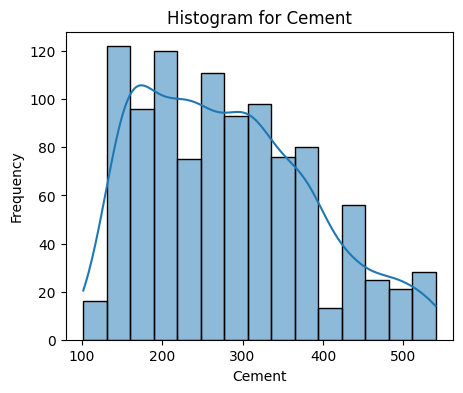

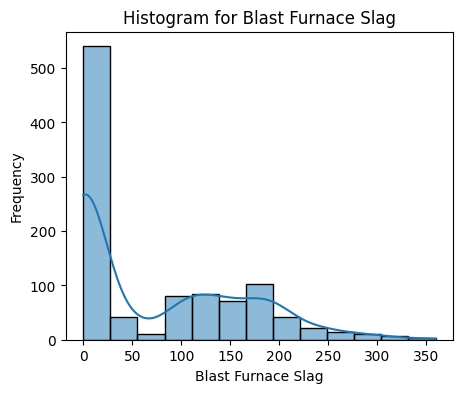

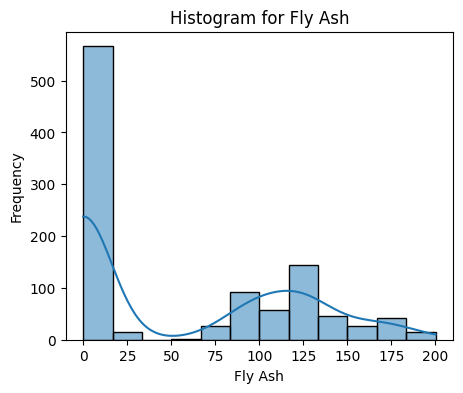

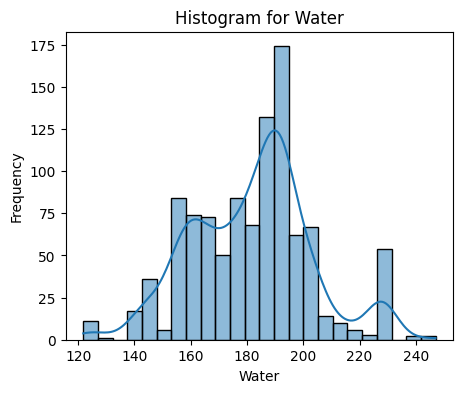

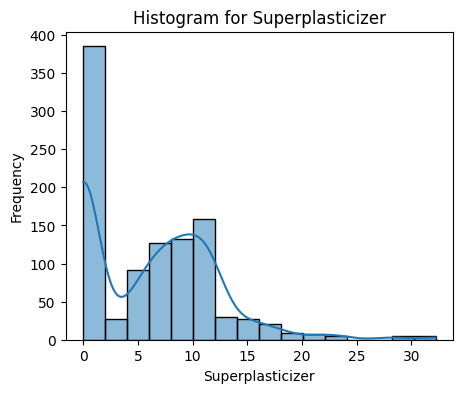

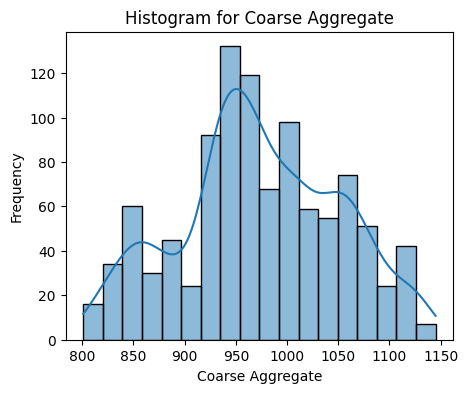

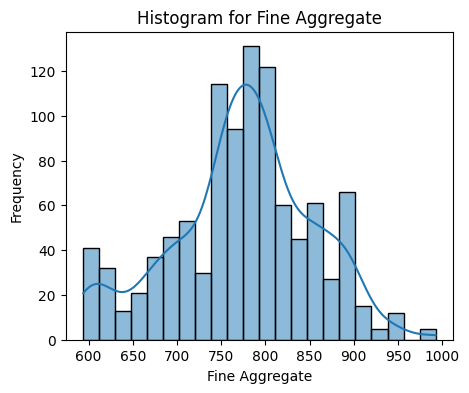

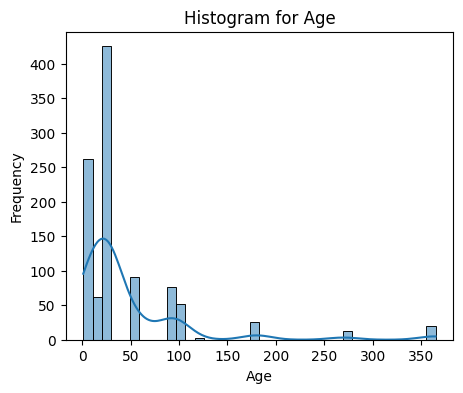

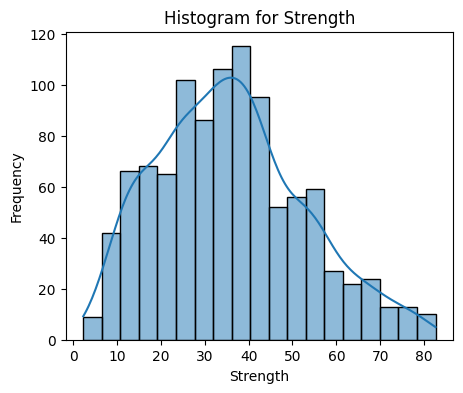

In [ ]:
# Histogram for all the columns
for col in df.select_dtypes(include=np.number):
  plt.figure(figsize=(5,4))
  sns.histplot(df[col], kde=True)
  plt.title(f'Histogram for {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
'''
Insights based on the Histogram
1. The histogram for "cement" shows that the data is highly skewed on the right.
2. The column "Blast Furnace Slug" shows the decreasing trend
3. The histogram for "Fly Ash" shows that the data is highly skewed on left.
4. The histogram for "Water"
5. The distribution of coarse aggregate is relatively normal or slightly skewed
'''

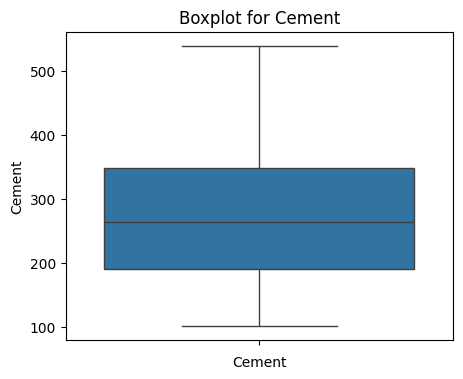

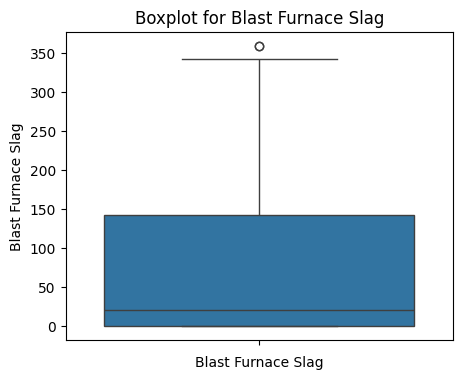

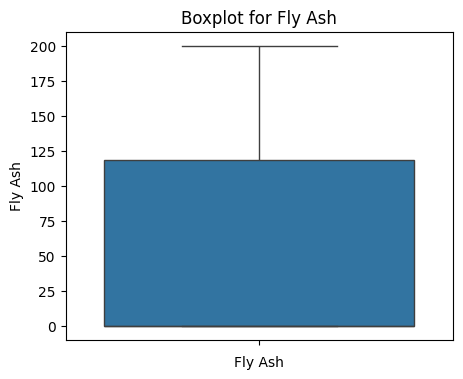

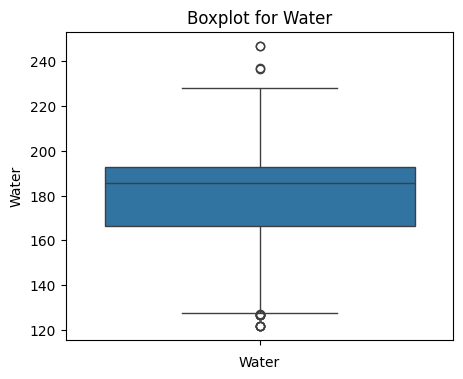

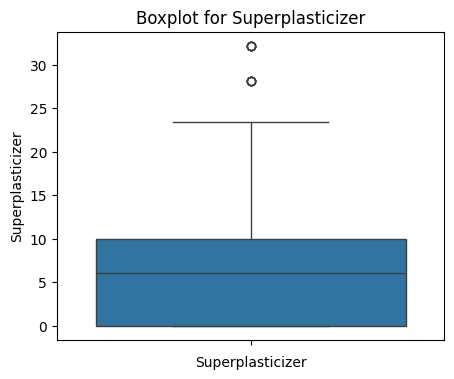

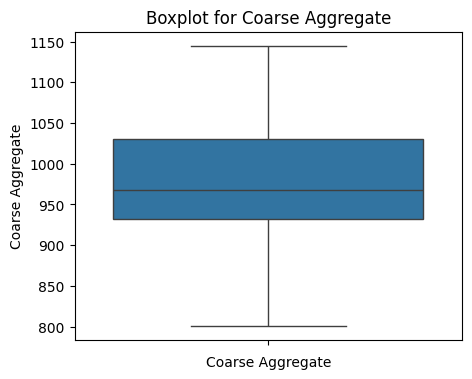

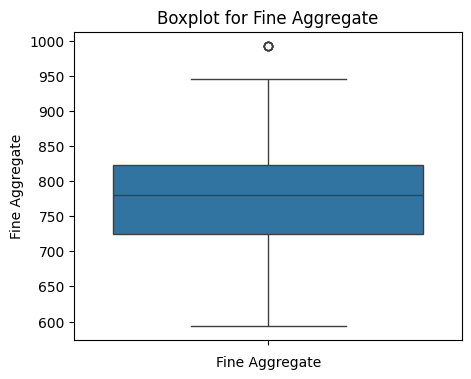

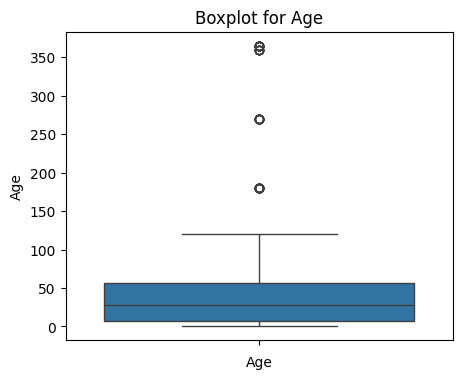

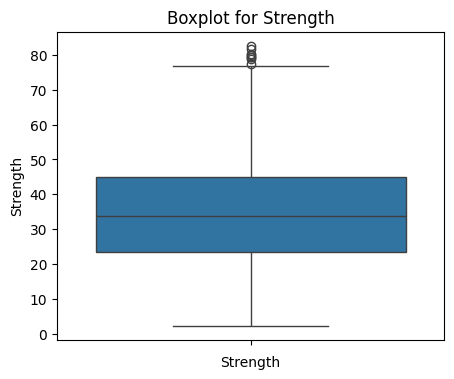

In [ ]:
# Boxplots for all the numerical columns
for col in df.select_dtypes(include=np.number):
  plt.figure(figsize=(5,4))
  sns.boxplot(df[col])
  plt.title(f'Boxplot for {col}')
  plt.xlabel(col)

In [ ]:
'''
Insights based on the box plot
1. The boxplots for Age, Fine Aggregate,Water,Superplasticizerm, Blast Furnace Slag shows outliers
2. The boxplots for Strength show lot of outliers
3. The boxplots for Age, Superplasticizerm, Blast Furnace Slag, Fly Ash	are more towards the lower level
'''

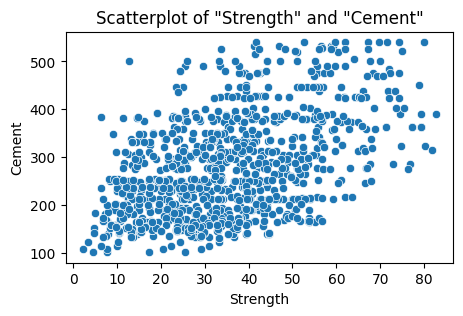

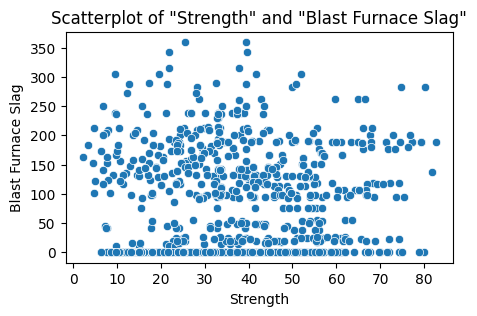

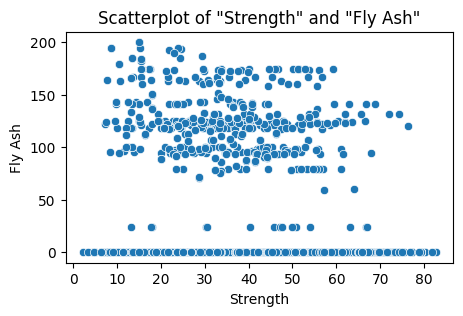

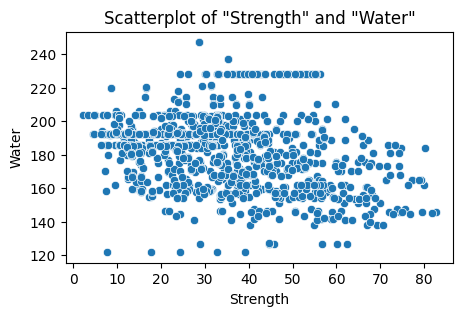

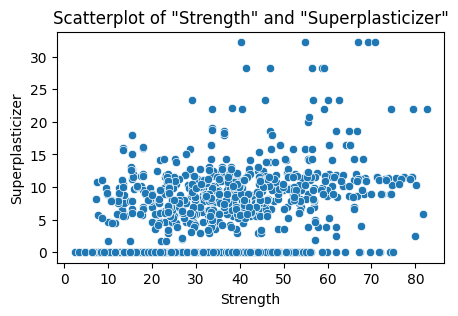

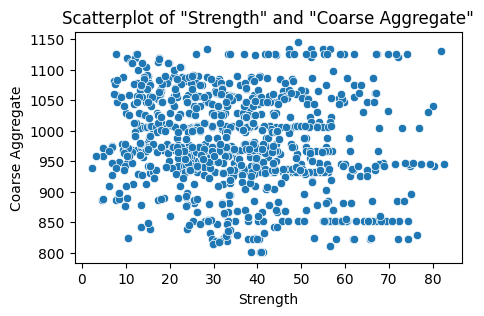

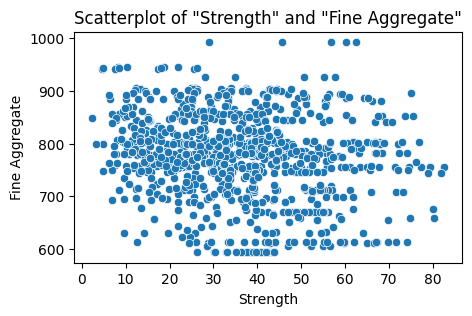

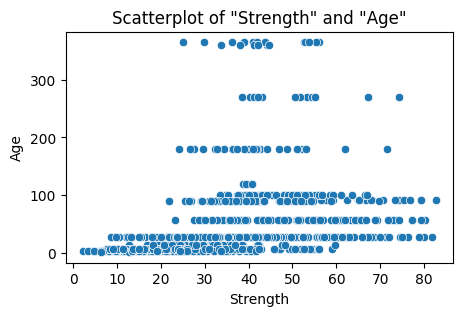

In [ ]:
#Scatterplot for Profit with other columns
for col in df.select_dtypes(include=np.number):
  if col != 'Strength':
    plt.figure(figsize = (5, 3))
    sns.scatterplot(x = 'Strength', y = col, data = df)
    plt.title(f'Scatterplot of "Strength" and "{col}"')
    plt.xlabel('Strength')
    plt.ylabel(col)
    plt.show()

In [ ]:
'''
Insights based on the scatter plot
1. The scatter plots for all the input values with the Target value is highly scattered
2. It doesnt show any correlation between the input values and the target value

'''

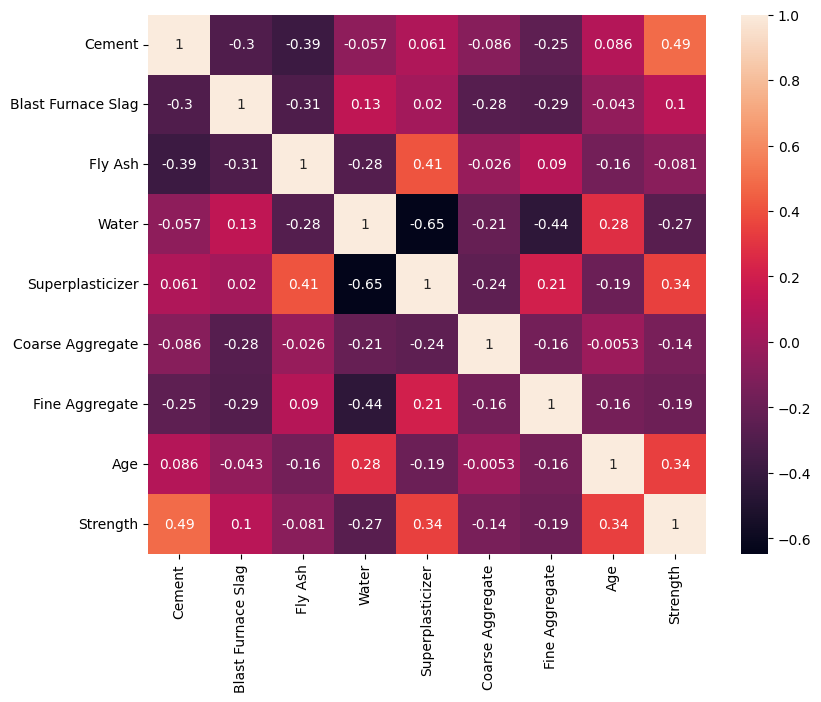

In [ ]:
# Correlation Analysis (Pearson's Correlation Coefficient)
plt.figure(figsize = (9, 7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
'''
The correlation analysis:
1. There is weak positive correlation between the strength and the input variable- cement
2. There is very weak positive correlation between the strength and the input variables- Age & superplasticizer
3. There is very weak negative correlation between the strength and water
4. There is no correlation between strength and the remaining input variables
'''

In [ ]:
'''
We are going to create 2 models ->
(1) Simple Linear Regression -> Strength ~ Cement
(2) Multiple Linear Regression -> Strength ~ Cement + Age+ Superplasticizer
'''

In [ ]:
# Linear Regression

In [ ]:
# Seperating input and output features
X= df[['Cement']]
y= df['Strength']

# Performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
# Creating the model
from sklearn.linear_model import LinearRegression

# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Taking predictions from the trained model on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
from sklearn.metrics import r2_score
print('Training R2 Score :', np.round(r2_score(y_train, y_train_pred), 2))
print('Testing R2 Score :', np.round(r2_score(y_test, y_test_pred), 2))

Training R2 Score : 0.24
Testing R2 Score : 0.21


In [ ]:
'''
Conclusion
1. The difference between training and testing peformance is within 5% (which is acceptable)
2. The model itself is highly underfitted and can be improved by using more input variables
'''

In [ ]:
# Multiple Linear Regression

In [ ]:
# Seperating input and output features
X= df[['Cement', 'Age', 'Superplasticizer']]
y= df['Strength']

# Performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
# Creating the model
from sklearn.linear_model import LinearRegression

# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Taking predictions from the trained model on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
from sklearn.metrics import r2_score
print('Training R2 Score :', np.round(r2_score(y_train, y_train_pred), 2))
print('Testing R2 Score :', np.round(r2_score(y_test, y_test_pred), 2))

Training R2 Score : 0.46
Testing R2 Score : 0.52


In [ ]:
'''
Conclusion
1. The difference between training and testing peformance is within 5% (which is acceptable)
2. The MLR model is slightly better than SLR model
3. Eventhough it is better it is still highly underfitted
'''

In [ ]:
#Lets try to clip the outliers and see how it affects the model performance

In [ ]:
# Select the numerical columns you want to clip
numerical_cols = ['Blast Furnace Slag', 'Age', 'Fine Aggregate', 'Water', 'Superplasticizer']

# Define the lower and upper percentiles for clipping (e.g., 1st and 99th percentiles)
lower_percentile = 0.01
upper_percentile = 0.99

# Calculate the clipping boundaries
for col in numerical_cols:
    lower_bound = df[col].quantile(lower_percentile)
    upper_bound = df[col].quantile(upper_percentile)

    # Clip the values in the column
    df[col] = np.clip(df[col], lower_bound, upper_bound)

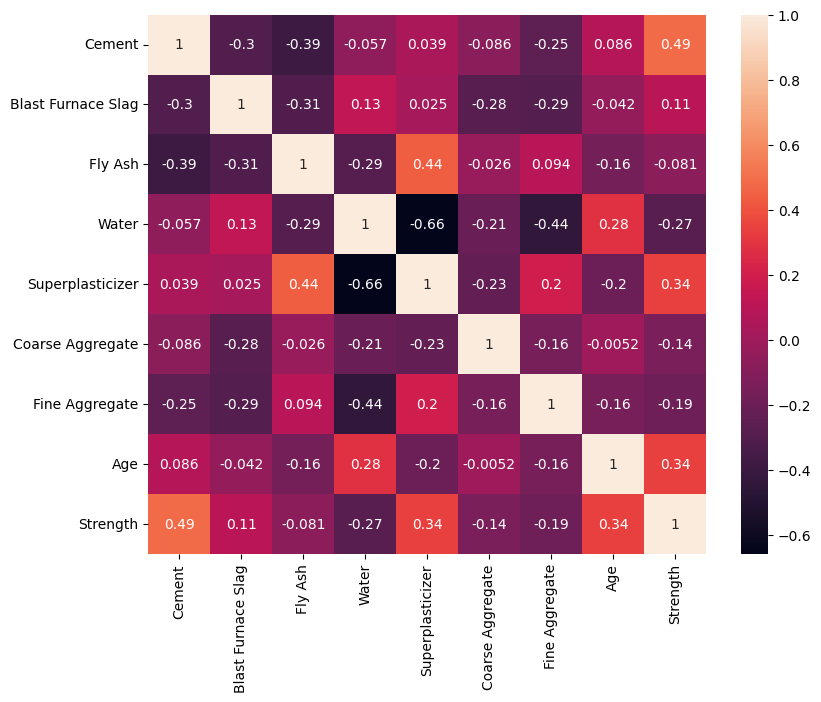

In [ ]:
# Trying to check the Correlation analysis gives a better correlation after clipping
# Correlation Analysis (Pearson's Correlation Coefficient)
plt.figure(figsize = (9, 7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
#Try to run LInear Regression model again

In [ ]:
# Seperating input and output features
X= df[['Cement', 'Age', 'Superplasticizer']]
y= df['Strength']

# Performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
# Creating the model
from sklearn.linear_model import LinearRegression

# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

# Predictions from the trained model on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Model Evaluation
from sklearn.metrics import r2_score
print('Training R2 Score :', np.round(r2_score(y_train, y_train_pred), 2))
print('Testing R2 Score :', np.round(r2_score(y_test, y_test_pred), 2))

Training R2 Score : 0.47
Testing R2 Score : 0.52


In [ ]:
'''
After clipping also there hasn't been an increase in the performance of the model
'''